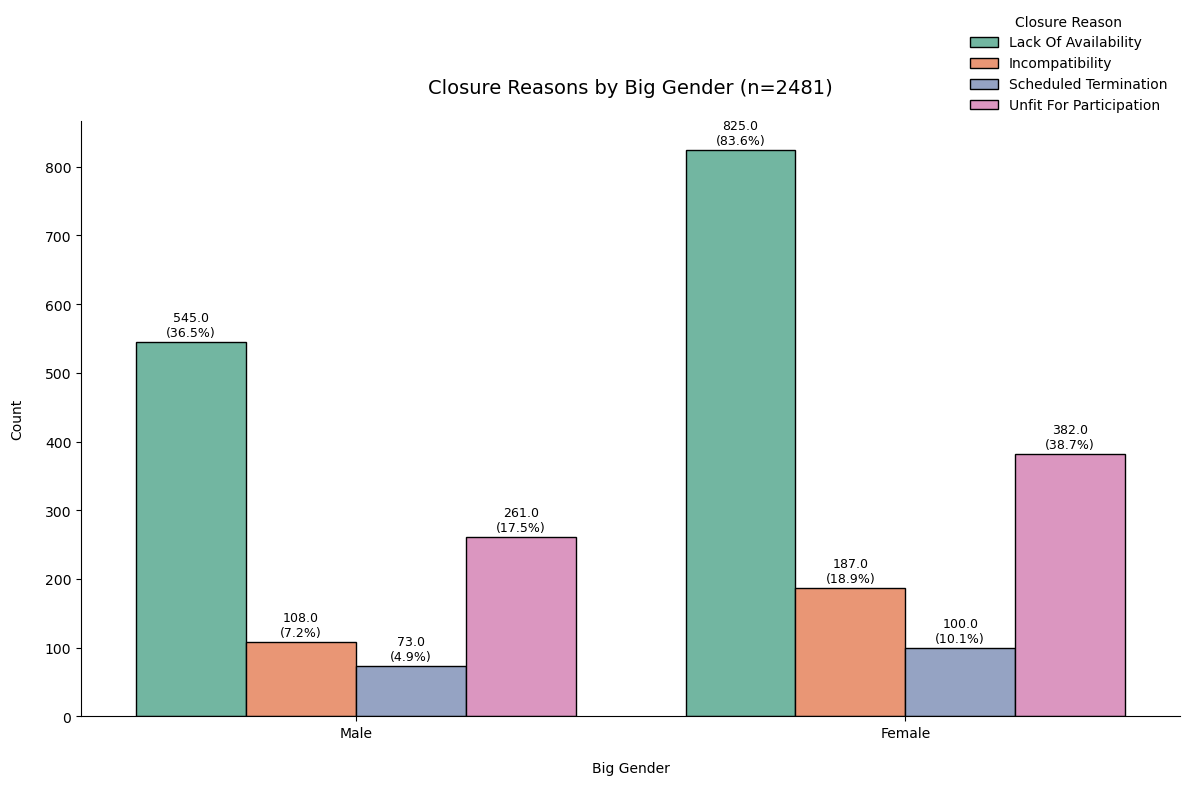

=== Primary Analysis ===
Chi-Square Statistic: 1.84
p-value: 0.6072
Degrees of Freedom: 3
Cramer's V: 0.027
All expected counts ≥5? Yes

Standardized Residuals (z-scores):
closure_reason_grp  Incompatibility  Lack Of Availability  \
Big Gender                                                  
Female                         0.70                   0.0   
Male                          -0.86                  -0.0   

closure_reason_grp  Scheduled Termination  Unfit For Participation  
Big Gender                                                          
Female                              -0.41                    -0.26  
Male                                 0.50                     0.33  


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv('new_novice.csv')
filtered_df = df[
    (df['Big Gender'].str.upper().isin(['MALE', 'FEMALE'])) &
    (df['closure_reason_grp'].notna()) &
    (df['closure_reason_grp'] != '')
].copy()

# Standardize text formatting
filtered_df['Big Gender'] = filtered_df['Big Gender'].str.title()
filtered_df['closure_reason_grp'] = filtered_df['closure_reason_grp'].str.title()

# Create count plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=filtered_df,
    x='Big Gender',
    hue='closure_reason_grp',
    palette='Set2',
    edgecolor='black',
    order=['Male', 'Female']
)

# Add annotations with counts and percentages
for container in ax.containers:
    # Get total counts per gender for percentage calculations
    totals = filtered_df['Big Gender'].value_counts()
    
    # Create labels with count and percentage
    labels = []
    for idx, bar in enumerate(container):
        gender = ax.get_xticks()[idx]  # 0 = Male, 1 = Female
        total = totals.iloc[idx]
        percentage = bar.get_height() / total
        labels.append(f"{bar.get_height()}\n({percentage:.1%})")
    
    ax.bar_label(container, 
                labels=labels,
                label_type='edge', 
                padding=2,
                fontsize=9)

# Add total counts above each gender group
for idx, gender in enumerate(['Male', 'Female']):
    total = filtered_df[filtered_df['Big Gender'] == gender].shape[0]

# Format plot
plt.title(f'Closure Reasons by Big Gender (n={len(filtered_df)})', pad=20, fontsize=14)
plt.xlabel('Big Gender', labelpad=15)
plt.ylabel('Count', labelpad=15)
plt.legend(title='Closure Reason', 
          bbox_to_anchor=(1, 1.2), 
          frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

# Create contingency table
contingency_table = pd.crosstab(
    filtered_df['Big Gender'],
    filtered_df['closure_reason_grp']
)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Effect size (Cramer's V)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Check assumptions
assumption_check = (expected >= 5).all()

# Post-hoc analysis (if significant)
posthoc_results = pd.DataFrame()
if p_value < 0.05 and not contingency_table.empty:
    from statsmodels.stats.multitest import multipletests
    
    # Fisher's exact for each reason
    p_values = []
    for reason in contingency_table.columns:
        reason_table = contingency_table[[reason]].join(contingency_table.sum(axis=1).rename('Total'))
        _, p = fisher_exact(reason_table)
        p_values.append(p)
    
    # Apply Bonferroni correction
    rejected, adj_p_values, _, _ = multipletests(p_values, method='bonferroni')
    
    # Format results
    posthoc_results = pd.DataFrame({
        'Closure Reason': contingency_table.columns,
        'Raw p-value': p_values,
        'Adjusted p-value': adj_p_values,
        'Significant': rejected
    })

# Print results
print("=== Primary Analysis ===")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Cramer's V: {cramers_v:.3f}")
print(f"All expected counts ≥5? {'Yes' if assumption_check else 'No'}")

if not posthoc_results.empty:
    print("\n=== Post-hoc Analysis ===")
    print(posthoc_results.to_string(index=False))

# Standardized residuals
print("\nStandardized Residuals (z-scores):")
residuals = (contingency_table - expected) / np.sqrt(expected)
print(residuals.round(2))

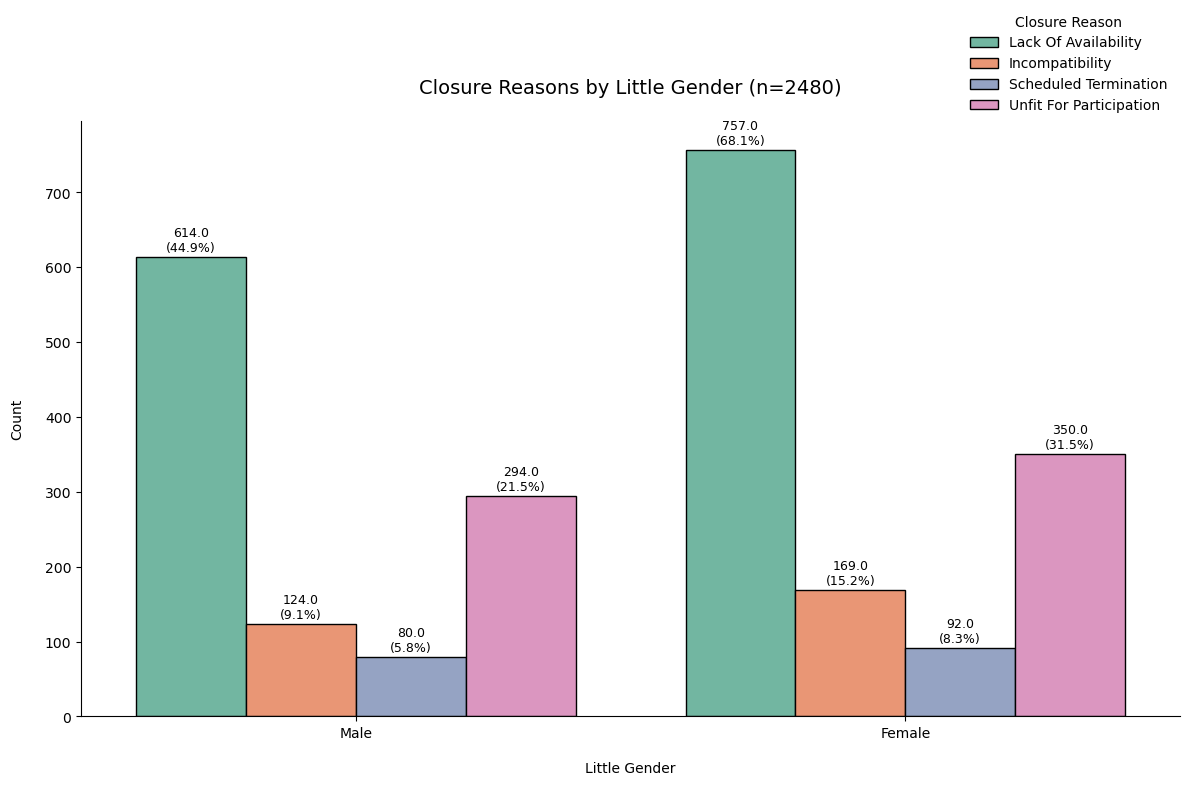

=== Primary Analysis ===
Chi-Square Statistic: 1.12
p-value: 0.7724
Degrees of Freedom: 3
Cramer's V: 0.021
All expected counts ≥5? Yes

Standardized Residuals (z-scores):
closure_reason_grp  Incompatibility  Lack Of Availability  \
Little Gender                                               
Female                         0.58                  0.03   
Male                          -0.64                 -0.03   

closure_reason_grp  Scheduled Termination  Unfit For Participation  
Little Gender                                                       
Female                              -0.30                    -0.28  
Male                                 0.33                     0.31  


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

# Load and clean data
df = pd.read_csv('new_novice.csv')
filtered_df = df[
    (df['Little Gender'].str.upper().isin(['MALE', 'FEMALE'])) &
    (df['closure_reason_grp'].notna()) &
    (df['closure_reason_grp'] != '')
].copy()

# Standardize text formatting
filtered_df['Little Gender'] = filtered_df['Little Gender'].str.title()
filtered_df['closure_reason_grp'] = filtered_df['closure_reason_grp'].str.title()

# Create count plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    data=filtered_df,
    x='Little Gender',
    hue='closure_reason_grp',
    palette='Set2',
    edgecolor='black',
    order=['Male', 'Female']
)

# Add annotations with counts and percentages
for container in ax.containers:
    # Get total counts per gender for percentage calculations
    totals = filtered_df['Little Gender'].value_counts()
    
    # Create labels with count and percentage
    labels = []
    for idx, bar in enumerate(container):
        gender = ax.get_xticks()[idx]  # 0 = Male, 1 = Female
        total = totals.iloc[idx]
        percentage = bar.get_height() / total
        labels.append(f"{bar.get_height()}\n({percentage:.1%})")
    
    ax.bar_label(container, 
                labels=labels,
                label_type='edge', 
                padding=2,
                fontsize=9)

# Add total counts above each gender group
for idx, gender in enumerate(['Male', 'Female']):
    total = filtered_df[filtered_df['Little Gender'] == gender].shape[0]

# Format plot
plt.title(f'Closure Reasons by Little Gender (n={len(filtered_df)})', pad=20, fontsize=14)
plt.xlabel('Little Gender', labelpad=15)
plt.ylabel('Count', labelpad=15)
plt.legend(title='Closure Reason', 
          bbox_to_anchor=(1, 1.2), 
          frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

# Create contingency table
contingency_table = pd.crosstab(
    filtered_df['Little Gender'],
    filtered_df['closure_reason_grp']
)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Effect size (Cramer's V)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Check assumptions
assumption_check = (expected >= 5).all()

# Post-hoc analysis (if significant)
posthoc_results = pd.DataFrame()
if p_value < 0.05 and not contingency_table.empty:
    from statsmodels.stats.multitest import multipletests
    
    # Fisher's exact for each reason
    p_values = []
    for reason in contingency_table.columns:
        reason_table = contingency_table[[reason]].join(contingency_table.sum(axis=1).rename('Total'))
        _, p = fisher_exact(reason_table)
        p_values.append(p)
    
    # Apply Bonferroni correction
    rejected, adj_p_values, _, _ = multipletests(p_values, method='bonferroni')
    
    # Format results
    posthoc_results = pd.DataFrame({
        'Closure Reason': contingency_table.columns,
        'Raw p-value': p_values,
        'Adjusted p-value': adj_p_values,
        'Significant': rejected
    })

# Print results
print("=== Primary Analysis ===")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Cramer's V: {cramers_v:.3f}")
print(f"All expected counts ≥5? {'Yes' if assumption_check else 'No'}")

if not posthoc_results.empty:
    print("\n=== Post-hoc Analysis ===")
    print(posthoc_results.to_string(index=False))

# Standardized residuals
print("\nStandardized Residuals (z-scores):")
residuals = (contingency_table - expected) / np.sqrt(expected)
print(residuals.round(2))